In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\Board Infinity\ML_Project\ML Project 1\bank-marketing.csv")

In [3]:
""" Describe the pdays column, make note of the mean, median and minimum values. Anything
fishy in the values?"""

' Describe the pdays column, make note of the mean, median and minimum values. Anything\nfishy in the values?'

In [4]:
df["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [5]:
df.head()

age           job  salary  marital  education targeted default  balance  \
0   58    management  100000  married   tertiary      yes      no     2143   
1   44    technician   60000   single  secondary      yes      no       29   
2   33  entrepreneur  120000  married  secondary      yes      no        2   
3   47   blue-collar   20000  married    unknown       no      no     1506   
4   33       unknown       0   single    unknown       no      no        1   

  housing loan  contact  day month  duration  campaign  pdays  previous  \
0     yes   no  unknown    5   may       261         1     -1         0   
1     yes   no  unknown    5   may       151         1     -1         0   
2     yes  yes  unknown    5   may        76         1     -1         0   
3     yes   no  unknown    5   may        92         1     -1         0   
4      no   no  unknown    5   may       198         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

In [6]:
median=df["pdays"].median(skipna=True)
mean=df["pdays"].mean(skipna=True)
min_value=df["pdays"].min(skipna=True)
print(median)
print(mean)
print(min_value)

-1.0
40.19782796222158
-1


In [7]:
# -1 value represent that the client was not previously not connected to campaign so we have to drop those values

In [8]:
df=df.drop(df[df["pdays"]==-1].index)
df.head()

age         job  salary  marital  education targeted default  balance  \
24060   33      admin.   50000  married   tertiary      yes      no      882   
24062   42      admin.   50000   single  secondary      yes      no     -247   
24064   33    services   70000  married  secondary      yes      no     3444   
24072   36  management  100000  married   tertiary      yes      no     2415   
24077   36  management  100000  married   tertiary      yes      no        0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
24060      no   no  telephone   21   oct        39         1    151         3   
24062     yes  yes  telephone   21   oct       519         1    166         1   
24064     yes   no  telephone   21   oct       144         1     91         4   
24072     yes   no  telephone   22   oct        73         1     86         4   
24077     yes   no  telephone   23   oct       140         1    143         3   

      poutcome response  
24060  failure       no  
24062    other      yes  
24064  failure      yes  
24072    other       no  
24077  failure      yes

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
"""Plot a horizontal bar graph with the median values of balance for each education level value.
Which group has the highest median?"""

'Plot a horizontal bar graph with the median values of balance for each education level value.\nWhich group has the highest median?'

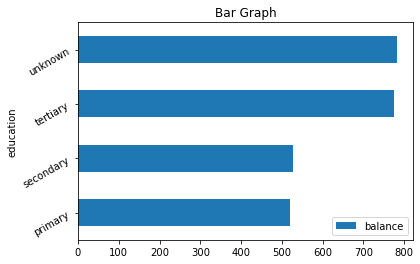

In [11]:
df[["balance","education"]].groupby("education").median().plot(kind="barh",rot=30)
plt.title("Bar Graph")
plt.show()

In [12]:
#so the highest value is from the "tertiary"

In [13]:
#Taks -- Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

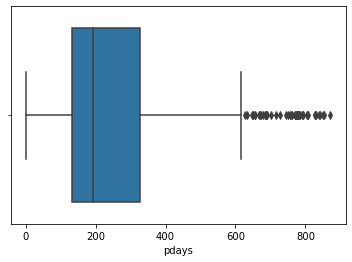

In [14]:
sns.boxplot(df["pdays"])

In [15]:
"""First, perform bi-variate analysis to identify the features that are directly associated with the target
variable. You can refer to the notebook we used for the EDA discussion.
- Convert the response variable to a convenient form
- Make suitable plots for associations with numerical features and categorical features"""

'First, perform bi-variate analysis to identify the features that are directly associated with the target\nvariable. You can refer to the notebook we used for the EDA discussion.\n- Convert the response variable to a convenient form\n- Make suitable plots for associations with numerical features and categorical features'

In [16]:
df.head(5)

age         job  salary  marital  education targeted default  balance  \
24060   33      admin.   50000  married   tertiary      yes      no      882   
24062   42      admin.   50000   single  secondary      yes      no     -247   
24064   33    services   70000  married  secondary      yes      no     3444   
24072   36  management  100000  married   tertiary      yes      no     2415   
24077   36  management  100000  married   tertiary      yes      no        0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
24060      no   no  telephone   21   oct        39         1    151         3   
24062     yes  yes  telephone   21   oct       519         1    166         1   
24064     yes   no  telephone   21   oct       144         1     91         4   
24072     yes   no  telephone   22   oct        73         1     86         4   
24077     yes   no  telephone   23   oct       140         1    143         3   

      poutcome response  
24060  failure       no  
24062    other      yes  
24064  failure      yes  
24072    other       no  
24077  failure      yes

In [17]:
#bi-variate analysis

In [18]:
#converting response variable to boolean data 

In [19]:
df=df.replace({"response":{"yes":1,"no":0}})

In [20]:
df.head()

age         job  salary  marital  education targeted default  balance  \
24060   33      admin.   50000  married   tertiary      yes      no      882   
24062   42      admin.   50000   single  secondary      yes      no     -247   
24064   33    services   70000  married  secondary      yes      no     3444   
24072   36  management  100000  married   tertiary      yes      no     2415   
24077   36  management  100000  married   tertiary      yes      no        0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
24060      no   no  telephone   21   oct        39         1    151         3   
24062     yes  yes  telephone   21   oct       519         1    166         1   
24064     yes   no  telephone   21   oct       144         1     91         4   
24072     yes   no  telephone   22   oct        73         1     86         4   
24077     yes   no  telephone   23   oct       140         1    143         3   

      poutcome  response  
24060  failure         0  
24062    other         1  
24064  failure         1  
24072    other         0  
24077  failure         1

<AxesSubplot:>

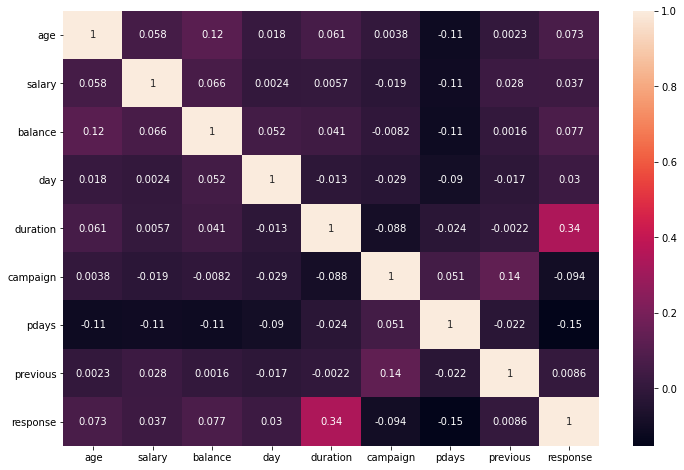

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='response', ylabel='count'>

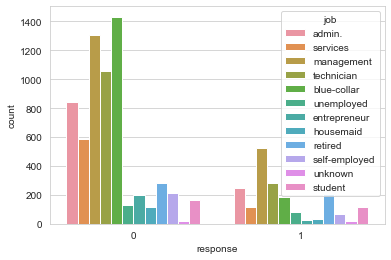

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='response',hue='job',data=df)

<AxesSubplot:xlabel='response', ylabel='count'>

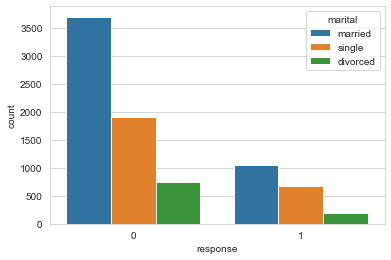

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='response',hue='marital',data=df)

<AxesSubplot:xlabel='response', ylabel='count'>

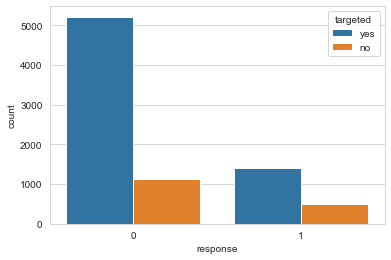

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='response',hue='targeted',data=df)

In [25]:
#Insight -- Number of responded people is very low even when we have targeted them

In [26]:
#detiled analysis of all the correlations and interactions among variables

In [27]:
import pandas_profiling 
from pandas_profiling import ProfileReport

In [28]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
numeric=df._get_numeric_data().columns.to_list()

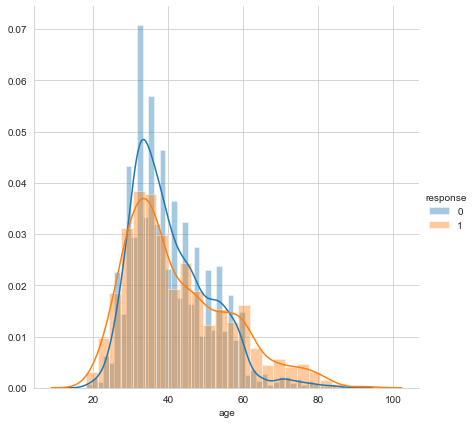

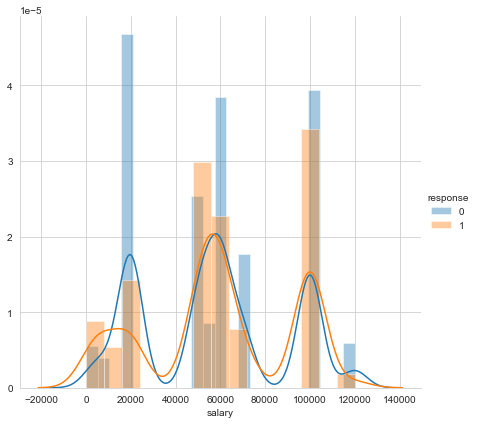

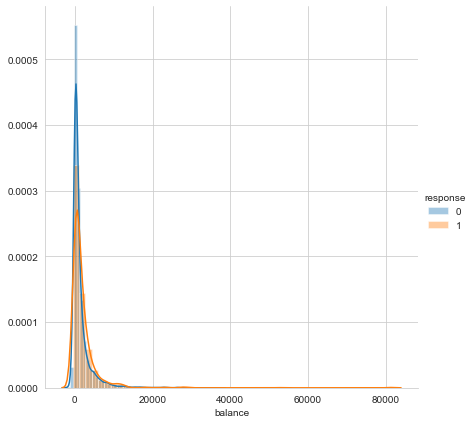

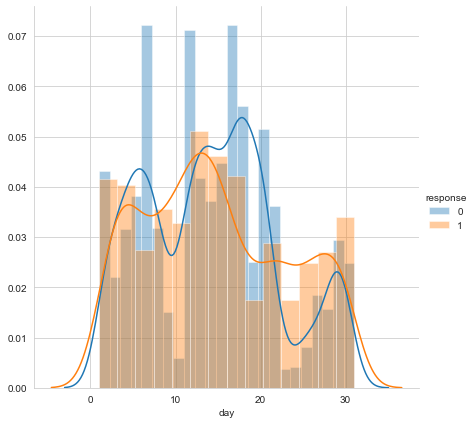

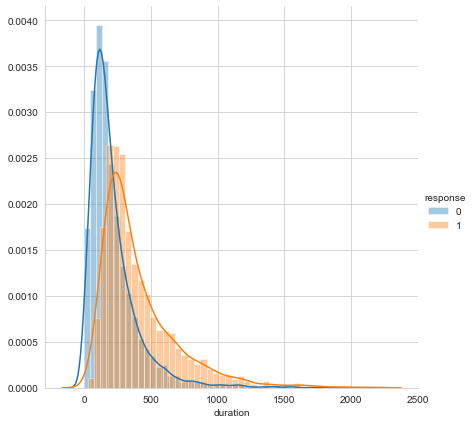

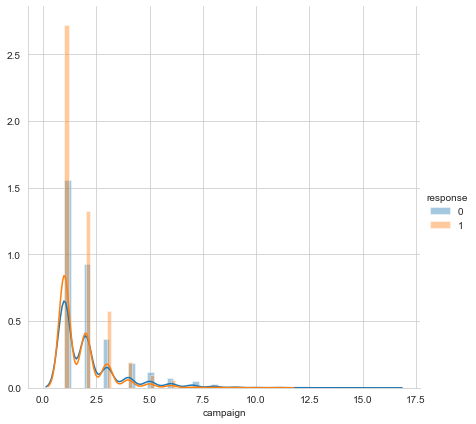

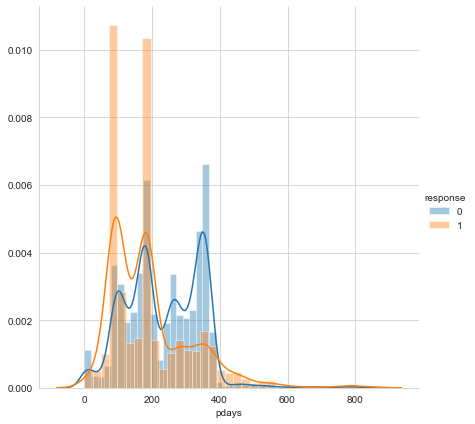

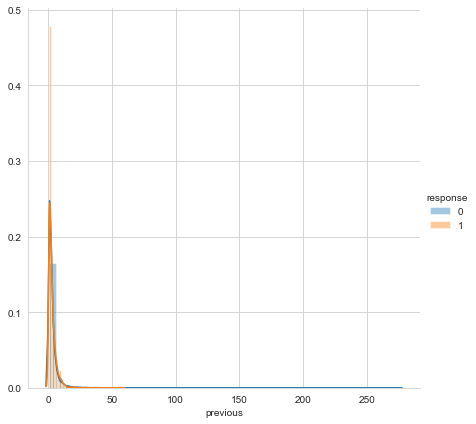

In [30]:
for i in numeric:
    if i != 'response':
        sns.FacetGrid(df, hue='response', height=6).map(sns.distplot,i).add_legend()

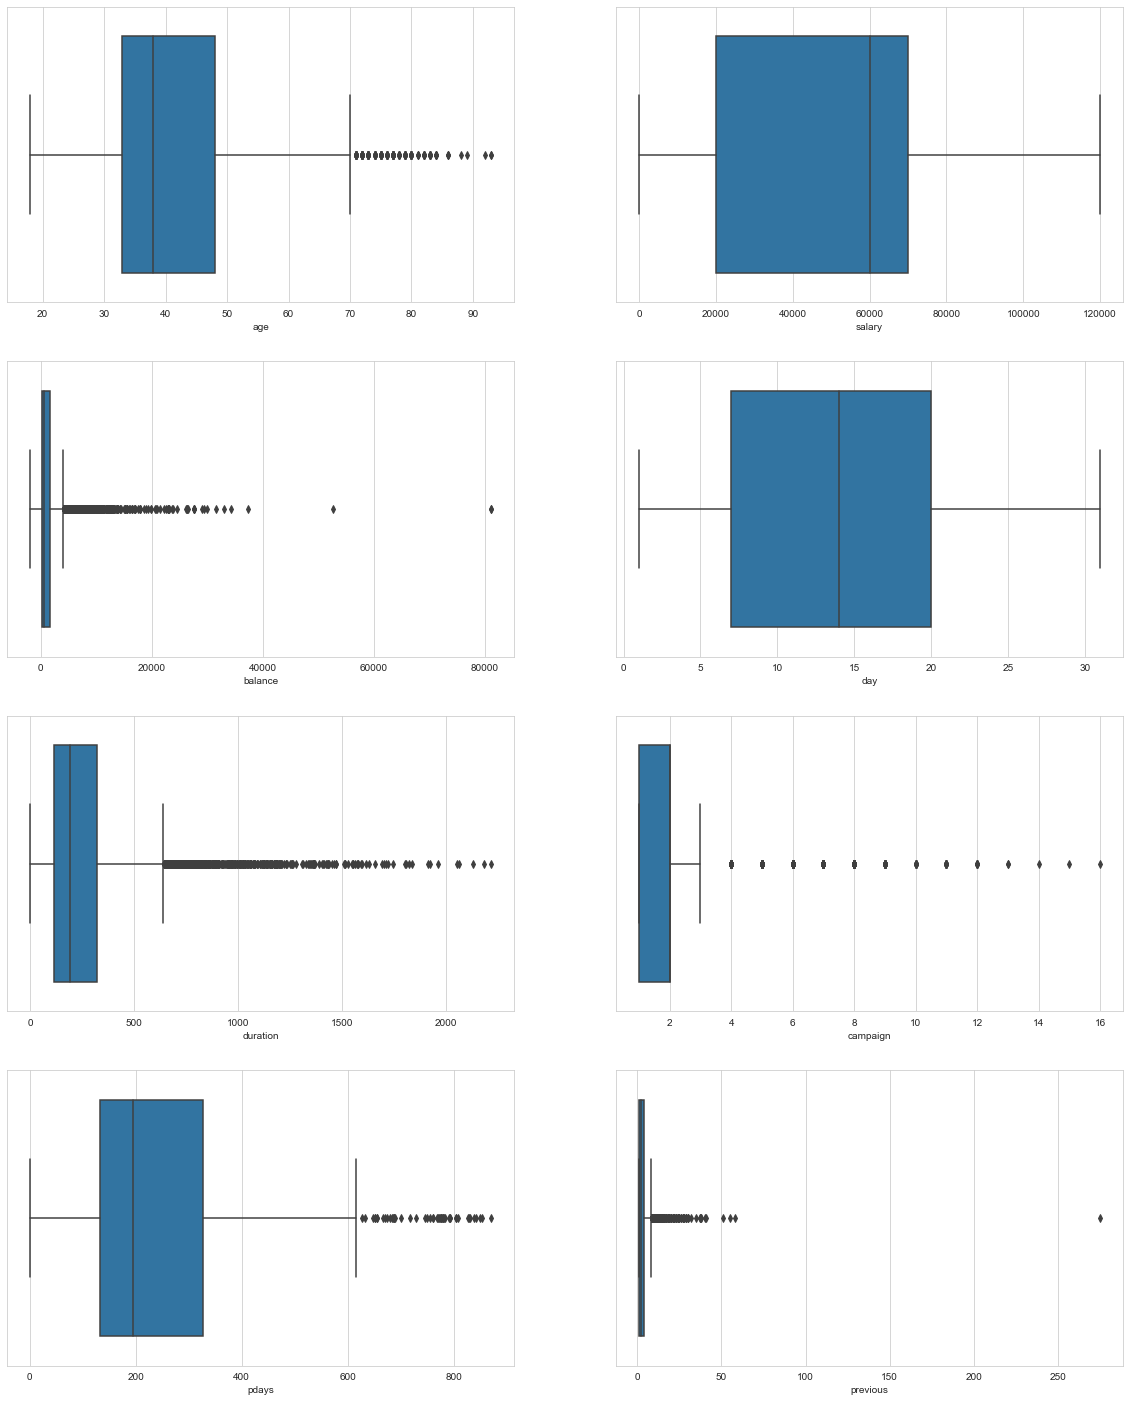

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

for ax, i in list(zip(axes.flat, numeric)):   
    if i != 'response':    
        sns.boxplot(i, data=df, ax=ax)

In [32]:
df.head()

age         job  salary  marital  education targeted default  balance  \
24060   33      admin.   50000  married   tertiary      yes      no      882   
24062   42      admin.   50000   single  secondary      yes      no     -247   
24064   33    services   70000  married  secondary      yes      no     3444   
24072   36  management  100000  married   tertiary      yes      no     2415   
24077   36  management  100000  married   tertiary      yes      no        0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
24060      no   no  telephone   21   oct        39         1    151         3   
24062     yes  yes  telephone   21   oct       519         1    166         1   
24064     yes   no  telephone   21   oct       144         1     91         4   
24072     yes   no  telephone   22   oct        73         1     86         4   
24077     yes   no  telephone   23   oct       140         1    143         3   

      poutcome  response  
24060  failure         0  
24062    other         1  
24064  failure         1  
24072    other         0  
24077  failure         1

<AxesSubplot:xlabel='age', ylabel='Density'>

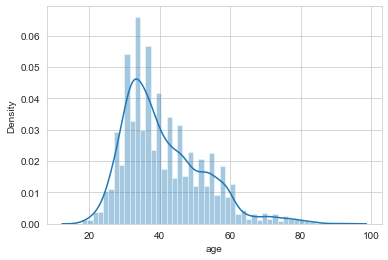

In [33]:
sns.distplot(df['age'].dropna())

In [34]:
#Task -- Are the features about the previous campaign data useful?


In [35]:
df[numeric].corr()['response']

age         0.072577
salary      0.036774
balance     0.076995
day         0.029952
duration    0.342610
campaign   -0.094110
pdays      -0.152206
previous    0.008622
response    1.000000
Name: response, dtype: float64

In [36]:
#as we can see here that the correlation is not that much with the previous campaign is not strong so previous campaign data is not useful

In [37]:
#Task --Are pdays and poutcome associated with the target? 

In [38]:
df[numeric].corr()['pdays']

age        -0.107863
salary     -0.106134
balance    -0.108122
day        -0.090095
duration   -0.024407
campaign    0.050534
pdays       1.000000
previous   -0.021885
response   -0.152206
Name: pdays, dtype: float64

In [39]:
#As we can see,if previous outcome is success there is a high chance to get successful response again, so here poutcome is relevent to be used as a final model.

In [40]:
#And for pdays, if the value is -1 then it means that the person is not previously connected to we have dropped those records

In [41]:
""" Task -- Before the predictive modeling part, make sure to perform –
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split"""

' Task -- Before the predictive modeling part, make sure to perform –\n- The necessary transformations for the categorical variables and the numeric variables\n- Handle variables corresponding to the previous campaign\n- Train test split'

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8257 non-null   int64 
 1   job        8257 non-null   object
 2   salary     8257 non-null   int64 
 3   marital    8257 non-null   object
 4   education  8257 non-null   object
 5   targeted   8257 non-null   object
 6   default    8257 non-null   object
 7   balance    8257 non-null   int64 
 8   housing    8257 non-null   object
 9   loan       8257 non-null   object
 10  contact    8257 non-null   object
 11  day        8257 non-null   int64 
 12  month      8257 non-null   object
 13  duration   8257 non-null   int64 
 14  campaign   8257 non-null   int64 
 15  pdays      8257 non-null   int64 
 16  previous   8257 non-null   int64 
 17  poutcome   8257 non-null   object
 18  response   8257 non-null   int64 
dtypes: int64(9), object(10)
memory usage: 1.5+ MB


In [43]:
data_type={'contact':'str'}
df=df.astype(data_type)

In [44]:
df.drop(df[df["poutcome"]=="unknow"].index,inplace=True)
df.drop(df[df["contact"]=="unknow"].index,inplace=True)
df.drop(df[df["job"]=="unknow"].index,inplace=True)
df=df.replace({'job':{'admin.':'admin'}})

In [45]:
#converting categorical variables into numericals

In [46]:
df_new = df.copy(deep=True)

In [47]:
all_cols = df.columns
categorical_columns = list(set(all_cols)-set(numeric))

In [48]:
from sklearn.preprocessing import LabelEncoder
df_new[categorical_columns] = df[categorical_columns].apply(LabelEncoder().fit_transform)

In [49]:
df_new.head()

age  job  salary  marital  education  targeted  default  balance  \
24060   33    0   50000        1          2         1        0      882   
24062   42    0   50000        2          1         1        0     -247   
24064   33    7   70000        1          1         1        0     3444   
24072   36    4  100000        1          2         1        0     2415   
24077   36    4  100000        1          2         1        0        0   

       housing  loan  contact  day  month  duration  campaign  pdays  \
24060        0     0        1   21     10        39         1    151   
24062        1     1        1   21     10       519         1    166   
24064        1     0        1   21     10       144         1     91   
24072        1     0        1   22     10        73         1     86   
24077        1     0        1   23     10       140         1    143   

       previous  poutcome  response  
24060         3         0         0  
24062         1         1         1  
24064         4         0         1  
24072         4         1         0  
24077         3         0         1

In [50]:
#Train test split

In [51]:
x=df_new
y=df_new.pop("response")
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
x_train.shape, y_train.shape

((5779, 18), (5779,))

In [52]:
#preprocessing 

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train[numeric[:-1]])

StandardScaler()

In [54]:
#Last collumn was response, but we no more have it in X_Train so -1 indicates exclusion of that

In [55]:
x_train[numeric[:-1]] = sc.transform(x_train[numeric[:-1]])
x_train.head()

age  job    salary  marital  education  targeted  default  \
26003  0.431841    9  0.074389        0          1         1        0   
32145  0.780609    6  0.074389        1          2         1        0   
28620 -0.876039    9  0.074389        0          1         1        0   
37741  1.652529    1 -1.189454        1          1         1        0   
44938  0.519033    3 -1.315838        2          2         0        0   

        balance  housing  loan  contact       day  month  duration  campaign  \
26003 -0.478498        1     0        0  0.586280      9 -0.350747  0.604947   
32145 -0.448239        1     0        0  0.083574      0 -0.649097 -0.679398   
28620 -0.515408        0     0        0  1.843044      4 -0.518831 -0.037226   
37741 -0.047553        1     0        0 -0.042102      8 -0.628086 -0.679398   
44938  0.559293        0     0        1 -1.047514     10  1.174618 -0.679398   

          pdays  previous  poutcome  
26003 -0.348373 -0.240504         1  
32145 -0.655124  0.157683         0  
28620 -0.514895  0.157683         1  
37741  1.290552 -0.439597         0  
44938 -0.164323 -0.041410         0

In [56]:
x_test[numeric[:-1]]=sc.transform(x_test[numeric[:-1]])
x_test.head()

age  job    salary  marital  education  targeted  default  \
35195 -0.527271    9  0.074389        1          1         1        0   
35225  0.780609    2  1.970154        1          1         1        0   
36780 -0.701655    0 -0.241571        0          1         1        0   
43289 -1.224807    8 -1.694991        2          1         1        0   
44971  0.606225    0 -0.241571        1          1         1        0   

        balance  housing  loan  contact       day  month  duration  campaign  \
35195 -0.221793        1     0        0 -0.921837      8  0.300580 -0.679398   
35225 -0.247397        1     1        0 -0.921837      8 -0.506225  3.815810   
36780 -0.654068        0     0        0 -0.293455      8  0.317388 -0.679398   
43289  0.732868        0     0        0  0.083574      7 -0.653299  0.604947   
44971 -0.515408        0     1        0 -0.419132     10 -0.279311 -0.679398   

          pdays  previous  poutcome  
35195  1.124030 -0.439597         0  
35225  0.650758 -0.240504         1  
36780  1.088973  0.356776         0  
43289 -1.093339 -0.439597         1  
44971 -1.040754  0.356776         0

In [57]:
#Predictive model 1: Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [59]:
lr=LogisticRegression()

In [60]:
lr.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_prediction=lr.predict(x_test)

In [62]:
y_prediction[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [63]:
print('Accuracy: ',accuracy_score(y_test, y_prediction))
print('\nPrecision: ',precision_score(y_test, y_prediction))
print('\nRecall: ',recall_score(y_test, y_prediction))
print('\nClassification Report\n')
print(classification_report(y_test, y_prediction))
print('\nconfusion_matrix\n')
print(confusion_matrix(y_test, y_prediction))

Accuracy:  0.8458434221146085

Precision:  0.696969696969697

Recall:  0.5130111524163569

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1940
           1       0.70      0.51      0.59       538

    accuracy                           0.85      2478
   macro avg       0.79      0.73      0.75      2478
weighted avg       0.84      0.85      0.84      2478


confusion_matrix

[[1820  120]
 [ 262  276]]


In [64]:
#Task -- Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [65]:
from sklearn.feature_selection import RFE
rfe=RFE(lr,15)

In [66]:
rfe=rfe.fit(x_train,y_train)
ranks=rfe.ranking_
ranks

array([1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1])

In [67]:
print(x_train.columns[rfe.support_])
cols = x_train.columns[rfe.support_]
lr.fit(x_train[cols],y_train)
y_pred2 = lr.predict(x_test[cols])

Index(['age', 'marital', 'education', 'targeted', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [68]:
print('Accuracy: ',accuracy_score(y_test, y_pred2))
print('\nPrecision: ',precision_score(y_test, y_pred2))
print('\nRecall: ',recall_score(y_test, y_pred2))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred2))
print('\nconfusion_matrix\n')
print(confusion_matrix(y_test, y_pred2))

Accuracy:  0.8466505246166263

Precision:  0.6994949494949495

Recall:  0.5148698884758365

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1940
           1       0.70      0.51      0.59       538

    accuracy                           0.85      2478
   macro avg       0.79      0.73      0.75      2478
weighted avg       0.84      0.85      0.84      2478


confusion_matrix

[[1821  119]
 [ 261  277]]


In [69]:
#Task -- - Using p values and VIF, get rid of the redundant features

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x_train[cols].columns
vif['VIF']=[variance_inflation_factor(x_train[cols].values,i).round(2) for i in range(x_train[cols].shape[1])]
vif=vif.sort_values(by='VIF',ascending=True)
vif

feature   VIF
4     default  1.02
9         day  1.02
13   previous  1.02
10   duration  1.03
5     balance  1.04
11   campaign  1.04
8     contact  1.14
7        loan  1.19
12      pdays  1.19
0         age  1.28
14   poutcome  1.73
6     housing  2.89
2   education  3.30
3    targeted  3.37
1     marital  4.37

In [71]:
#calculating P-value

In [72]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a=sm.add_constant(x_train[cols])
b=y_train

In [73]:
y_train.shape

(5779,)

In [74]:
model=sm.OLS(b,a)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     166.9
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:33:31   Log-Likelihood:                -2212.0
No. Observations:                5779   AIC:                             4456.
Df Residuals:                    5763   BIC:                             4563.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2066      0.027      7.548      0.0

In [75]:
pvalues=[]
for i in cols:
    v=round(result.pvalues[i],3)
    pvalues.append(v)
    
v=zip(cols,pvalues)
df_pvalues=pd.DataFrame(v,columns=["features","pvalues"]).sort_values("pvalues")
df_pvalues

features  pvalues
6     housing    0.000
7        loan    0.000
10   duration    0.000
11   campaign    0.000
14   poutcome    0.000
8     contact    0.010
2   education    0.014
1     marital    0.040
5     balance    0.194
0         age    0.222
3    targeted    0.364
13   previous    0.491
4     default    0.693
9         day    0.736
12      pdays    0.738

In [76]:
final_cols=df_pvalues.nlargest(8,'pvalues')['features'].to_list()
final_cols

['pdays',
 'day',
 'default',
 'previous',
 'targeted',
 'age',
 'balance',
 'marital']

In [77]:
lr.fit(x_train[final_cols],y_train)
y_pred3=lr.predict(x_test[final_cols])

print('Accuracy: ',accuracy_score(y_test, y_pred3))
print('\nPrecision: ',precision_score(y_test, y_pred3))
print('\nRecall: ',recall_score(y_test, y_pred3))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred3))
print('\nconfusion_matrix\n')
print(confusion_matrix(y_test, y_pred3))

Accuracy:  0.7820823244552058

Precision:  0.4

Recall:  0.007434944237918215

Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1940
           1       0.40      0.01      0.01       538

    accuracy                           0.78      2478
   macro avg       0.59      0.50      0.45      2478
weighted avg       0.70      0.78      0.69      2478


confusion_matrix

[[1934    6]
 [ 534    4]]


In [78]:
#extracting the best features of the dataset

In [79]:
from sklearn.feature_selection import SelectFromModel
smf=SelectFromModel(lr)
smf.fit(x_train,y_train)
features=smf.get_support()
features_name=x_train.columns[features]
features_name


Index(['default', 'housing', 'loan', 'contact', 'duration', 'poutcome'], dtype='object')

In [80]:
#Building Random-Forest Model

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,max_depth=5)
rfc.fit(x_train,y_train)
y_rf=rfc.predict(x_test)
print('Accuracy: ',accuracy_score(y_test, y_rf))
print('\nPrecision: ',precision_score(y_test, y_rf))
print('\nRecall: ',recall_score(y_test, y_rf))
print('\nClassification Report\n')
print(classification_report(y_test, y_rf))
print('\nconfusion_matrix\n')
print(confusion_matrix(y_test, y_rf))

Accuracy:  0.8518966908797417

Precision:  0.7785016286644951

Recall:  0.44423791821561337

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1940
           1       0.78      0.44      0.57       538

    accuracy                           0.85      2478
   macro avg       0.82      0.70      0.74      2478
weighted avg       0.84      0.85      0.84      2478


confusion_matrix

[[1872   68]
 [ 299  239]]


In [82]:
#Task -- - Estimate the model performance using k fold cross validation

In [83]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=50,max_depth=5),x,y,cv=5)

array([0.78329298, 0.80387409, 0.84312538, 0.85705633, 0.58691702])

In [ ]:
#Using the feature importance values from the Random Forest module, identify the most important features for the mode

In [88]:
imp=rfc.feature_importances_
feature_importances=pd.Series(imp, index=x_train.columns).sort_values(ascending=False)
selected_features= feature_importances.index.to_list()[:5]
print(selected_features)

['poutcome', 'duration', 'housing', 'pdays', 'month']


In [90]:
rfc.fit(x_train[selected_features],y_train)
y_rf2=rfc.predict(x_test[selected_features])
print('Accuracy: ',accuracy_score(y_test, y_rf2))
print('\nPrecision: ',precision_score(y_test, y_rf2))
print('\nRecall: ',recall_score(y_test, y_rf2))
print('\nClassification Report\n')
print(classification_report(y_test, y_rf2))
print('\nconfusion_matrix\n')
print(confusion_matrix(y_test, y_rf2))

Accuracy:  0.8579499596448749

Precision:  0.7597765363128491

Recall:  0.5055762081784386

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1940
           1       0.76      0.51      0.61       538

    accuracy                           0.86      2478
   macro avg       0.82      0.73      0.76      2478
weighted avg       0.85      0.86      0.85      2478


confusion_matrix

[[1854   86]
 [ 266  272]]


In [91]:
cross_val_score(RandomForestClassifier(n_estimators=50,max_depth=5),x,y,cv=5)

array([0.781477  , 0.82506053, 0.84857662, 0.8600848 , 0.60629921])

In [ ]:
#Compare the performance of the Random Forest and the logistic model –

In [93]:
cross_val_score(LogisticRegression(),x,y,cv=5)

array([0.79539952, 0.72215496, 0.77892187, 0.7752877 , 0.75529982])

In [ ]:
#so as we can see that accoring to croos validation score, the random forest model is working well and we should use this for prediction